# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/baner/Downloads/archive (1)/complete_dataset.csv")

# Loading the dataset

In [4]:
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


# Generating Information about the dataset

In [5]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB
None


In [6]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


# Checking for null values

In [7]:
print(df.isnull().sum())

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64


In [8]:
df.duplicated().sum()

0

In [9]:
df["date"] = pd.to_datetime(df["date"])

# Filling the null values in solar_exposure and rainfall with the median values

In [10]:
df["solar_exposure"].fillna(df["solar_exposure"].median(), inplace=True)
df["rainfall"].fillna(df["rainfall"].median(), inplace=True)

# Encoding school_day and holiday (categorical values) into 0 and 1

In [11]:
df["school_day"] = df["school_day"].map({"Y": 1, "N": 0})
df["holiday"] = df["holiday"].map({"Y": 1, "N": 0})

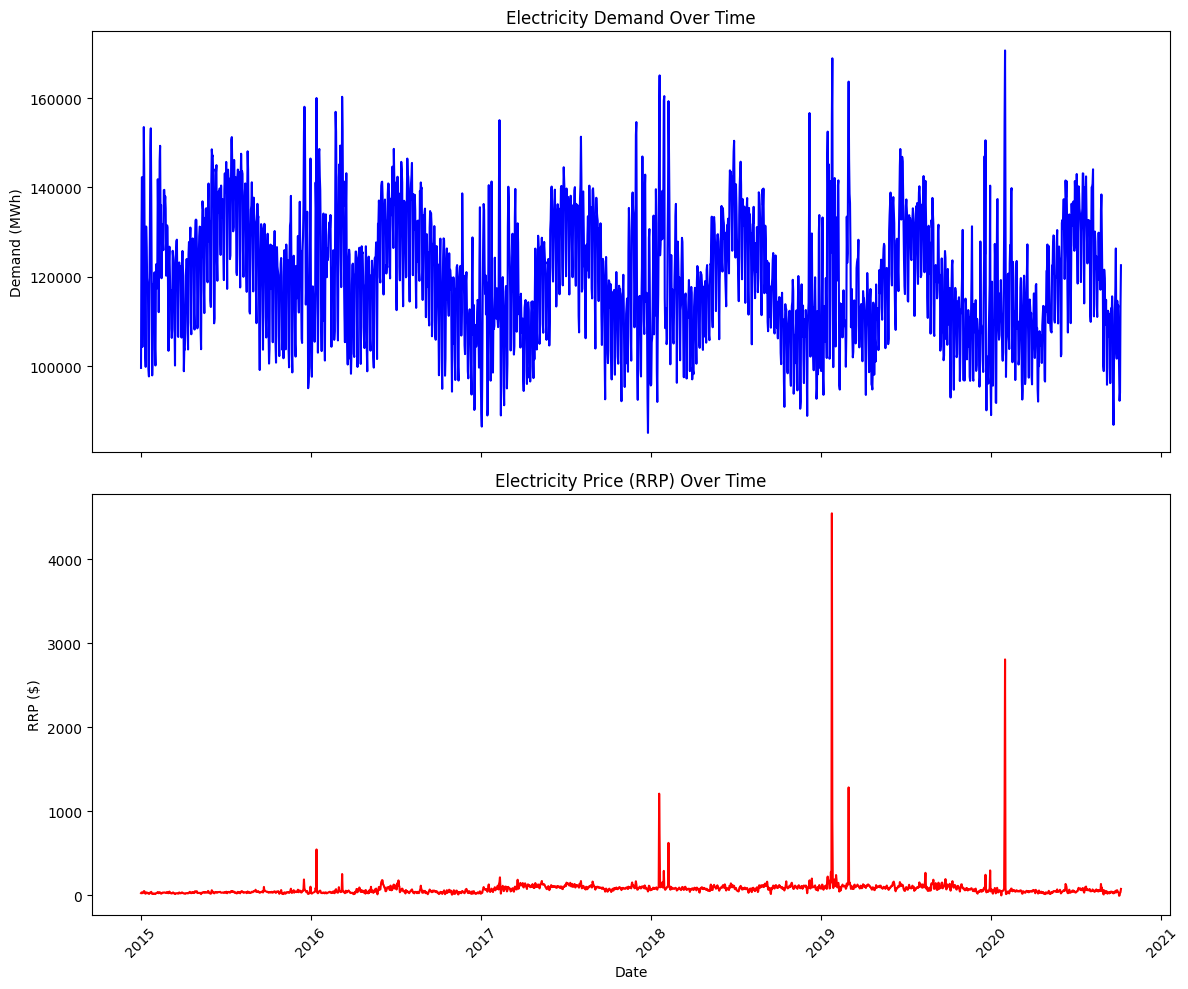

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.lineplot(x=df["date"], y=df["demand"], ax=axes[0], color="blue")
axes[0].set_title("Electricity Demand Over Time")
axes[0].set_ylabel("Demand (MWh)")

sns.lineplot(x=df["date"], y=df["RRP"], ax=axes[1], color="red")
axes[1].set_title("Electricity Price (RRP) Over Time")
axes[1].set_ylabel("RRP ($)")

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The demand for electricity increases and fluctuates over time, showing seasonal patterns.
# The RRP (electricity price) also exhibits fluctuations, spiking the most during the year 2019. This suggests a strong demand during that year, possibly influenced by supply constraints.

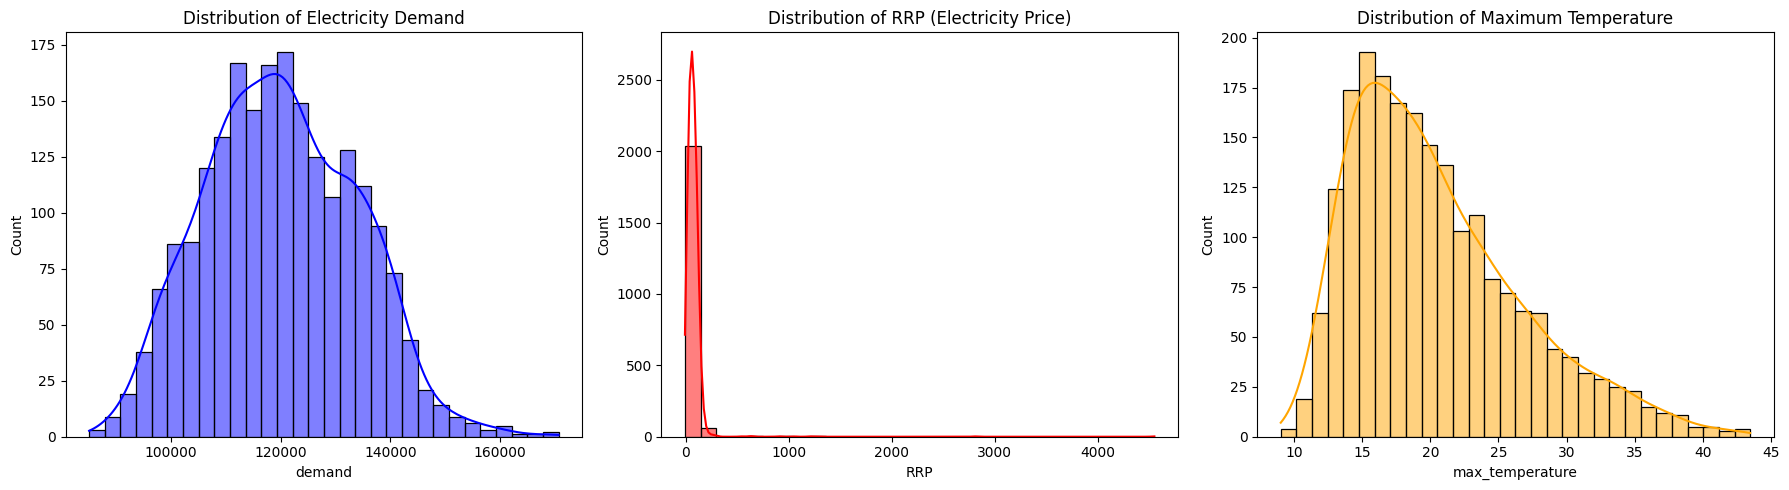

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["demand"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Electricity Demand")

sns.histplot(df["RRP"], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title("Distribution of RRP (Electricity Price)")

sns.histplot(df["max_temperature"], bins=30, kde=True, ax=axes[2], color="orange")
axes[2].set_title("Distribution of Maximum Temperature")

plt.tight_layout()
plt.show()

# The histogram of electricity demand likely shows a left-skewed distribution, meaning most of the demand values are concentrated at lower levels, with occasional peaks at higher values.
# The RRP histogram is left-skewed, with the maximum count between the range of 0-250. These could be due to supply constraints, sudden increases in demand, or regulatory price caps being exceeded.
# The temperature histogram also follows a more left-skewed distribution, depending on the region. It implies comparatively low heat events from the range of 10-25. A uniform or bimodal distribution could indicate distinct seasonal weather patterns.

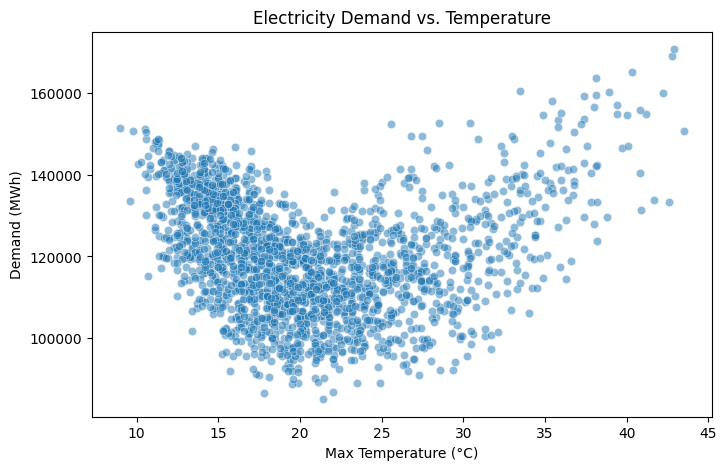

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["max_temperature"], y=df["demand"], alpha=0.5)
plt.title("Electricity Demand vs. Temperature")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Demand (MWh)")
plt.show()

# The demand of electricity is high and mostly concentrated when the max temperature is 10-25 degrees Celsius.

C:\Users\baner\AppData\Local\Temp\ipykernel_21028\3847882209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["school_day"], y=df["demand"], palette="coolwarm")


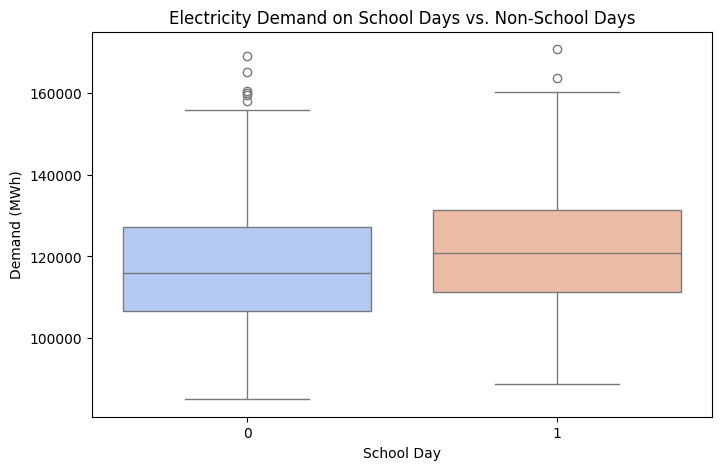

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["school_day"], y=df["demand"], palette="coolwarm")
plt.title("Electricity Demand on School Days vs. Non-School Days")
plt.xlabel("School Day")
plt.ylabel("Demand (MWh)")
plt.show()

# The average of electricity demand is higher when there is a school day for students as compared to when there is a holiday which suggests that educational institutions contribute significantly to energy consumption.

C:\Users\baner\AppData\Local\Temp\ipykernel_21028\3620468583.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["month"], y=df["demand"], ci=None, marker="o")


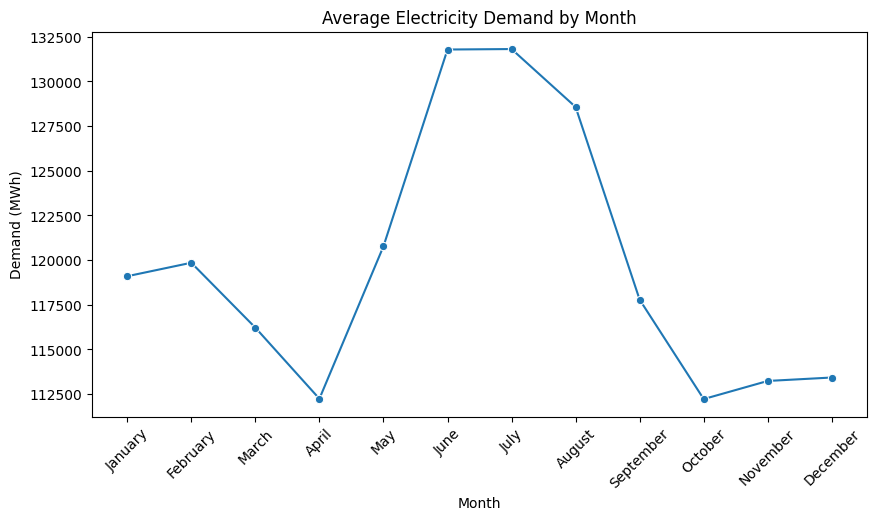

In [16]:
df["month"] = df["date"].dt.month
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["month"], y=df["demand"], ci=None, marker="o")
plt.title("Average Electricity Demand by Month")
plt.xlabel("Month")
plt.ylabel("Demand (MWh)")
plt.xticks(range(1, 13),['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'], 
           rotation=45)
plt.show()

# The month of June and July has accounted for the most demand of electricity by an average of ~131250 MWh. On the other hand, April and Ocotober have recorded the least demand of electricity.

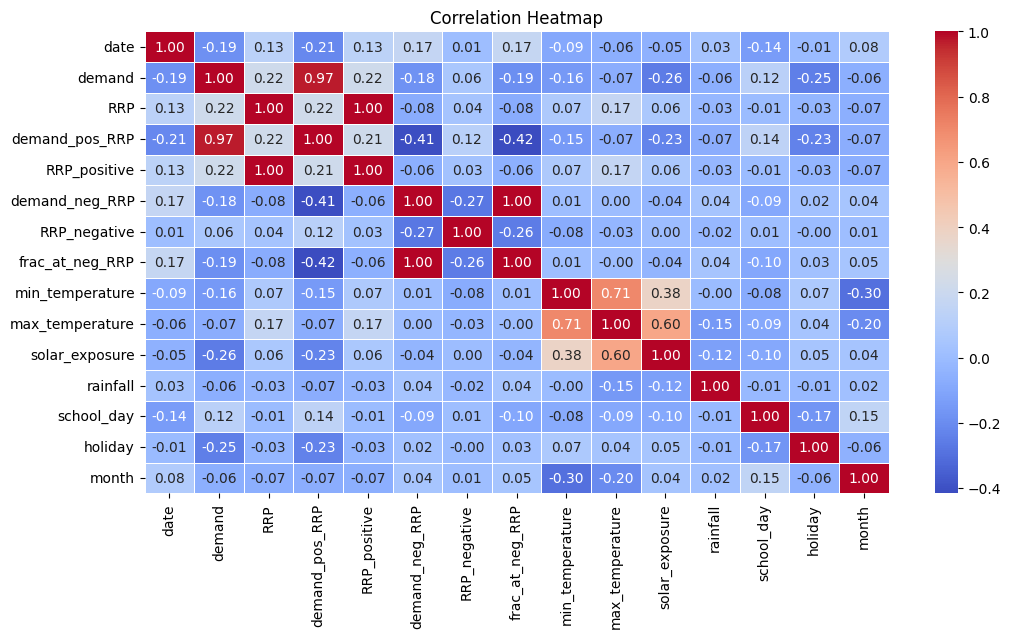

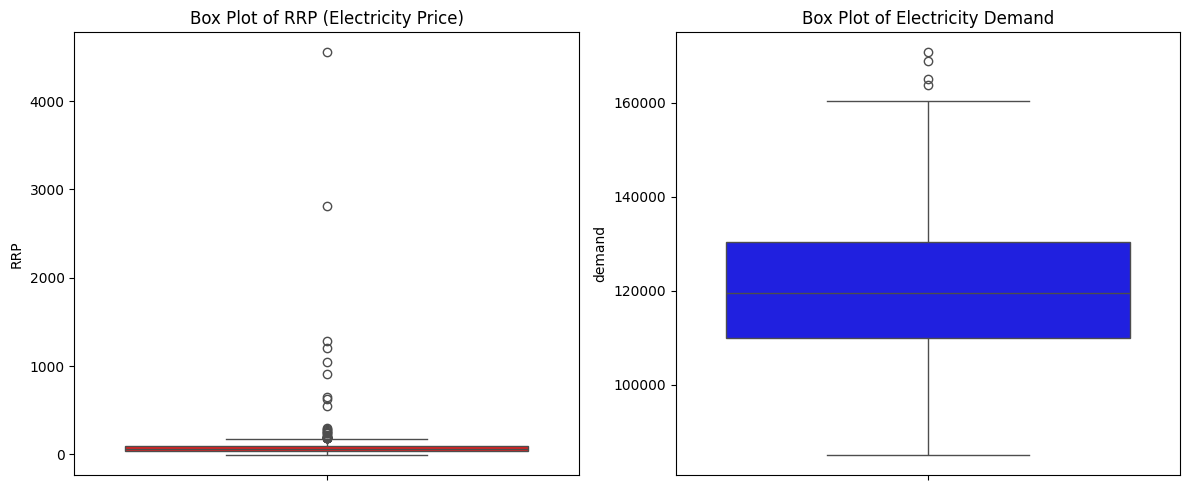

In [17]:
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Box plots to analyze distribution of RRP and demand
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df["RRP"], ax=axes[0], color="red")
axes[0].set_title("Box Plot of RRP (Electricity Price)")

sns.boxplot(y=df["demand"], ax=axes[1], color="blue")
axes[1].set_title("Box Plot of Electricity Demand")

plt.tight_layout()
plt.show()


# Electricity demand has a strong correlation with temperature and other environmental factors, suggesting weather conditions significantly impact energy consumption. A weaker correlation with price suggests other market dynamics also influence RRP.
# The presence of outliers in the box plots indicates periods of exceptionally high electricity demand and price, which could be due to extreme weather events or economic activity.

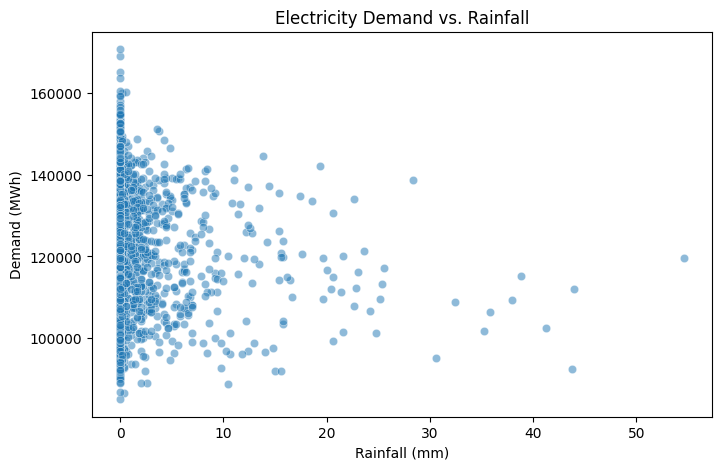

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["rainfall"], y=df["demand"], alpha=0.5)
plt.title("Electricity Demand vs. Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Demand (MWh)")
plt.show()

# When there is absolutely no rainfall (0mm) and if it is between 0-5mm rainfall, the demand is highest.

C:\Users\baner\AppData\Local\Temp\ipykernel_21028\1112526623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peak_demand_days.index, y=peak_demand_days.values, palette="coolwarm")


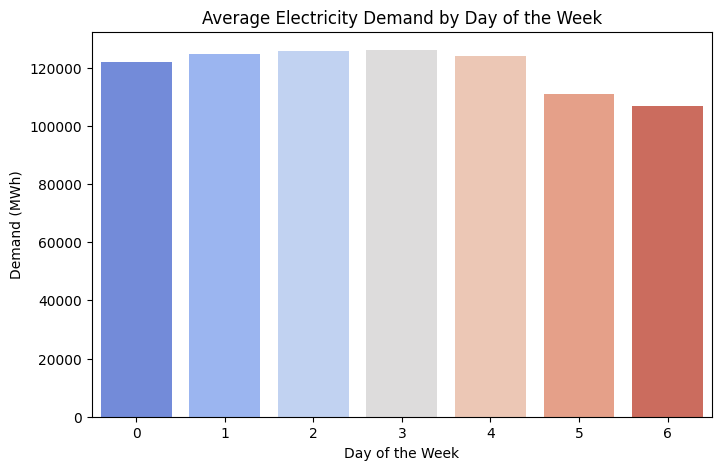

In [19]:
peak_demand_days = df.groupby(df["date"].dt.dayofweek)["demand"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=peak_demand_days.index, y=peak_demand_days.values, palette="coolwarm")
plt.title("Average Electricity Demand by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Demand (MWh)")
plt.show()

# Tuesday and Wednesday are the days where electricity are most in demand.





# Solutions
Introduce incentives for consumers to reduce usage during peak hours (e.g., dynamic pricing, off-peak discounts).

Invest in large-scale energy storage to handle sudden demand spikes without price surges.

Increase reliance on solar and wind energy during high-demand periods to reduce dependency on expensive non-renewable sources.

Implement AI/ML models to forecast demand and adjust pricing dynamically to prevent extreme price spikes.

Encourage energy-efficient heating and cooling solutions (e.g., insulation, smart thermostats) to reduce excessive seasonal spikes.

Schools should switch to energy-efficient lighting and solar panels to help offset peak-hour electricity usage. Lab sessions, sports activities, and other energy-intensive operations can be scheduled during non-peak hours to distribute demand more evenly.
